In [1]:
import yaml
import numpy as np
from math import sqrt,log10
import pylab as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d as interp

%matplotlib inline

In [2]:
J, L = np.load('results/LikeJ.npy')
r = open('results/results.yaml')
res = yaml.load(r)
r.close()

In [3]:
res

{'Jmin': 16.731731731731731,
 'Nstars': 715,
 'a': 22.46277653578313,
 'b': 1.7146361482738839,
 'c': 1.092776529343081,
 'r': 0.08269384961275836,
 'rho': 841863186505.2157}

In [4]:
Jmin = res['Jmin']
Ja = res['a']
Jb = res['b']
Jc = res['c']
Jr = res['r']
Jrho = res['rho']

In [5]:
J_new = np.linspace(J.min(),J.max())
interp_L = interp(J,L)

In [6]:
for i,c in enumerate([0.5, 2.0, 4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, J_new.min(), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, Jmin, J_new.max()) - Jmin))

In [13]:
from scipy.optimize import curve_fit

def parabola(x, *p):
    a, b, c = p
    return a*x**2 + b*x + c

p0 = [1, 1, 1]
coeff, var_matrix = curve_fit(parabola, J, L, p0=p0)

In [16]:
coeff

array([   2.41194252,  -77.64065369,  625.13868989])

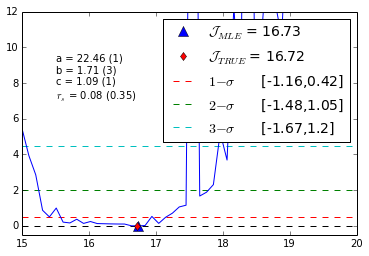

In [20]:
plt.plot(J_new, interp_L(J_new))
#plt.plot(J_new,parabola(J_new,*coeff))
plt.hlines(0, J_new.min(), J_new.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5, 2.0, 4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J_new.min(), J_new.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(15.5, 7,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr)

plt.ylim(-0.5,12)
#plt.savefig('results/LikeJ_50p.png',format='png',dpi=300);